<a href="https://colab.research.google.com/github/GigasTaufan/tubes-dti/blob/master/data-cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [169]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [170]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
data.drop(['Loan_ID'], axis=1, inplace = True)

In [172]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [173]:
data ['LoanAmount'] = data['LoanAmount'].replace(np.NaN , data['LoanAmount'].mean())
data ['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace(np.NaN , data['Loan_Amount_Term'].mean())

In [174]:
data.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [175]:
g=data.groupby('Property_Area')['Property_Area']

g.count()

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64

In [176]:
f=data.groupby('Dependents')['Dependents']

f.count()

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [177]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})
data['Married'] = data['Married'].map({'No':1, 'Yes':0})
data['Property_Area'] = data['Property_Area'].map({'Rural':1, 'Semiurban':0,'Urban':2})
data['Dependents'] = data['Dependents'].map({'1':1, '0':0,'2':2,'3+':3})


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6ebebddd8>,
      dtype=object)

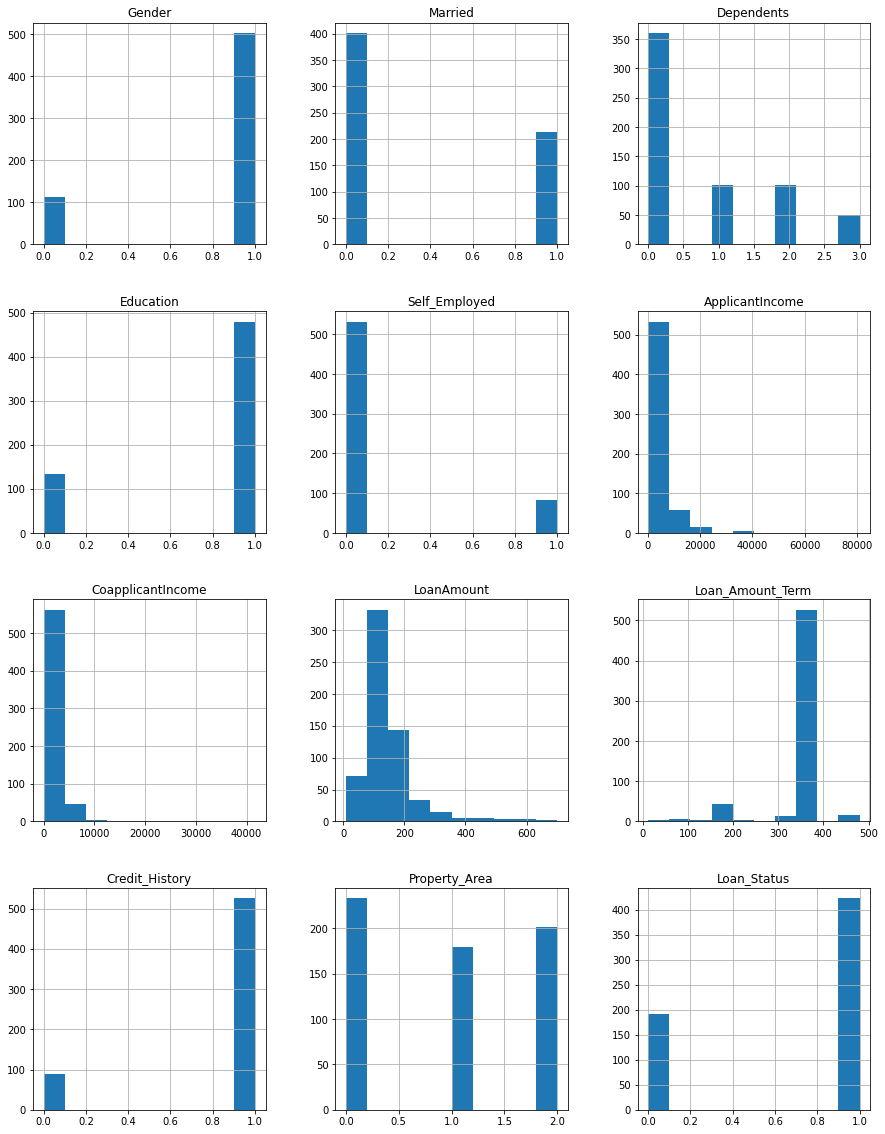

In [178]:
# data.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

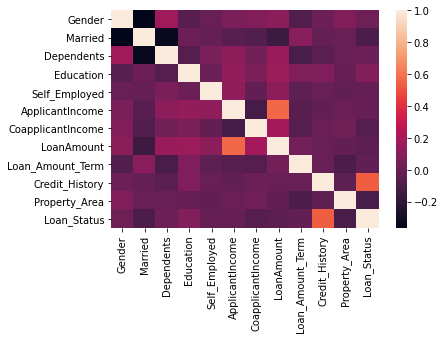

In [179]:
sns.heatmap(data.corr());

In [180]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.082045,0.017987
Married,-0.364569,1.000000,-0.334216,0.012304,-0.004489,-0.051708,-0.075948,-0.147141,0.100863,-0.010938,0.003071,-0.091478
Dependents,0.172914,-0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.001781,0.010118
Education,-0.045364,0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,-0.003592,0.085884
Self_Employed,-0.000525,-0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.021996,-0.003700
ApplicantIncome,0.058809,-0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.007894,-0.004710
CoapplicantIncome,0.082912,-0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.028356,-0.059187
LoanAmount,0.107930,-0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.013799,-0.036416
Loan_Amount_Term,-0.073567,0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.089508,-0.020974
Credit_History,0.009170,-0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.030248,0.540556


# Naive

In [181]:
x = data.drop(["Loan_Status"], axis = 1)
y = data["Loan_Status"]

In [182]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [183]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [184]:
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[21, 21],
       [ 7, 74]])

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        42
           1       0.78      0.91      0.84        81

    accuracy                           0.77       123
   macro avg       0.76      0.71      0.72       123
weighted avg       0.77      0.77      0.76       123

